# Full Tutorial Notebook

## Package Imports

In [1]:
!python -m pip uninstall be_scan --yes
!python -m pip install git+https://github.com/liaulab/be-scan.git

Found existing installation: be_scan 0.0.2
Uninstalling be_scan-0.0.2:
  Successfully uninstalled be_scan-0.0.2
  Cloning https://github.com/liaulab/be-scan.git to /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-8phyk5i5
  Running command git clone --filter=blob:none --quiet https://github.com/liaulab/be-scan.git /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-8phyk5i5
  Resolved https://github.com/liaulab/be-scan.git to commit 37d374ae2fc629d7a37f7b240cfee982dec53172
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for be_scan: filename=be_scan-0.0.2-py3-none-any.whl size=59103 sha256=e7cff7663cc767c93f8b4b1284a5b521996d60e34bc8f9535fc5ea4daed020c2
  Stored in directory: /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-ephem-wheel-cache-6kcrh5vc/wheels/81/ba/a2/4367f86e4791b638c5e713c171c019cfd4874f1c2cfc054f4c
Successfully bui

In [2]:
import warnings
warnings.filterwarnings('ignore')
import be_scan

## be_scan.sgrna Function Calls

In [4]:
from be_scan.sgrna import *
sgrna_dir = "../../../tests/test_data/sgrna/"

### Function 1 be_scan.sgrna.generate_library()

In [6]:
guides = generate_library(
    gene_filepath  = f"{sgrna_dir}230408_AR_Input.fasta", # filepath to gene .fasta
    gene_name      = "AR", 
    cas_type       = "SpG", 
    output_name    = "CBE_guides.csv", 
    edit_from = "C", edit_to = "T", 
    exclude_introns = False, exclude_nonediting = False, 
    exclude_duplicates = True, exclude_sequences = ['TTTT'], 
    )
guides.head(5)

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1595 guides were generated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,sgRNA_strand,gene_strand,gene
0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,sense,plus,AR
1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,sense,plus,AR
2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,sense,plus,AR
3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,sense,plus,AR
4,aagctcaaggATGGAAGTGC,AGT,2,-1,67545137,0,-1,-1,aagctcaaggATGGAAGTGC,sense,plus,AR


### Function 2 be_scan.sgrna.annotate()

In [8]:
annotated_guides = annotate(
    guides_file      = "CBE_guides.csv",
    protein_filepath = f"{sgrna_dir}P10275.fasta", # this can also be left empty
    output_name      = 'CBE_annotated.csv',
    edit_from = "C", edit_to = "T",
    exclude_duplicates = True, 
    )
annotated_guides.head(5)

Guides annotated for C to T.


,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,sgRNA_strand,gene_strand,gene,CtoT_win_overlap,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,sense,plus,AR,Intron,0,None,None,Intron
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,sense,plus,AR,Intron,0,None,None,Intron
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,sense,plus,AR,Intron,0,None,None,Intron
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,sense,plus,AR,Intron,0,None,None,Intron
4,sgRNA_4,aagctcaaggATGGAAGTGC,AGT,2,-1,67545137,0,-1,-1,aagctcaaggATGGAAGTGC,sense,plus,AR,Intron,0,None,None,Intron


### Function 3 be_scan.sgrna.reference_check()

This function takes about a minute to run independent of library size. 
This step is not necessary and can be skipped. 

In [ ]:
# Optional download reference genome

! wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
! gunzip hg38.fa.gz

In [9]:
checked_guides = reference_check(
    guides_file  = "CBE_annotated.csv", # file generated from previous step
    genome_file  = f"{sgrna_dir}hg38_short.fa",
    output_name  = 'CBE_filtered.csv',
    )
checked_guides.head(5)

5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
Guides checked against reference genome
0 guides out of 1595 occurred more than once in the reference genome


,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,sgRNA_strand,gene_strand,gene,CtoT_win_overlap,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ref_occurrences
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,sense,plus,AR,Intron,0,NaN,NaN,Intron,0
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,sense,plus,AR,Intron,0,NaN,NaN,Intron,0
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,sense,plus,AR,Intron,0,NaN,NaN,Intron,0
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,sense,plus,AR,Intron,0,NaN,NaN,Intron,0
4,sgRNA_787,CTTCCATccttgagcttggc,tga,0,6,67545153,0,3,-1,gccaagctcaaggATGGAAG,antisense,plus,AR,Intron,2,E2K;M1I;M1I/E2K,Missense;Missense;Missense/Missense,Missense,0


In [ ]:
coverage_plots(
    guides_file  = "CBE_filtered.csv", 
    protein_filepath = f"{sgrna_dir}P10275.fasta", 
    edit_from = "C", edit_to = "T",
)

### Function 1-3 Combined be_scan.sgrna.design_library()

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1595 guides were generated
Guides annotated for A to G.
Guides annotated for C to T.
Guides annotated for AC to GT.
5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
Guides checked against reference genome
0 guides out of 1595 occurred more than once in the reference genome
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Index(['sgRNA_ID', 'sgRNA_seq', 'PAM_seq', 'starting_frame', 'gene_pos',
       'chr_pos', 'exon', 'windowstart_pos', 'windowend_pos', 'coding_seq',
       'sgRNA_strand', 'gene_strand', 'gene', 'AtoG_win_overlap', 'A_count',
       'AtoG_mutations', 'AtoG_muttypes', 'AtoG_muttype', 'CtoT_win_overlap',
       'C_count', 'CtoT_mutations', 'CtoT_muttypes', 'CtoT_muttype',
       'ACtoGT_win_overlap', 'AC_count', 'ACtoGT_mutations', 'ACtoGT_mutty

,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,...,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ACtoGT_win_overlap,AC_count,ACtoGT_mutations,ACtoGT_muttypes,ACtoGT_muttype,ref_occurrences
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
4,sgRNA_787,CTTCCATccttgagcttggc,tga,0,6,67545153,0,3,-1,gccaagctcaaggATGGAAG,...,2,E2K;M1I;M1I/E2K,Missense;Missense;Missense/Missense,Missense,Intron,3,M1I;E2K;M1I/E2K;M1T/E2K;M1T,Missense;Missense;Missense/Missense;Missense/M...,Missense,0


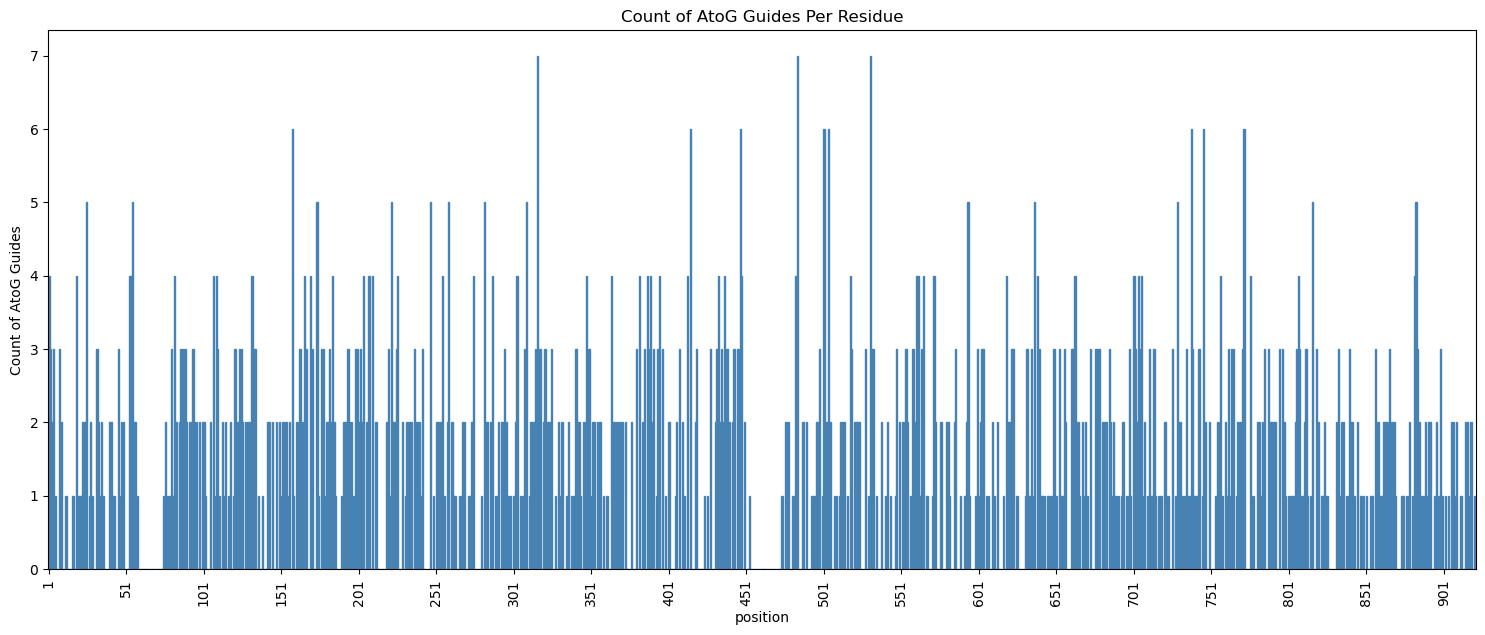

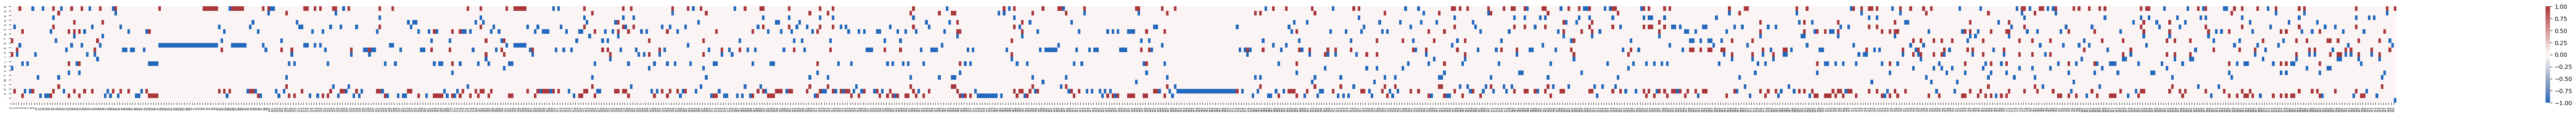

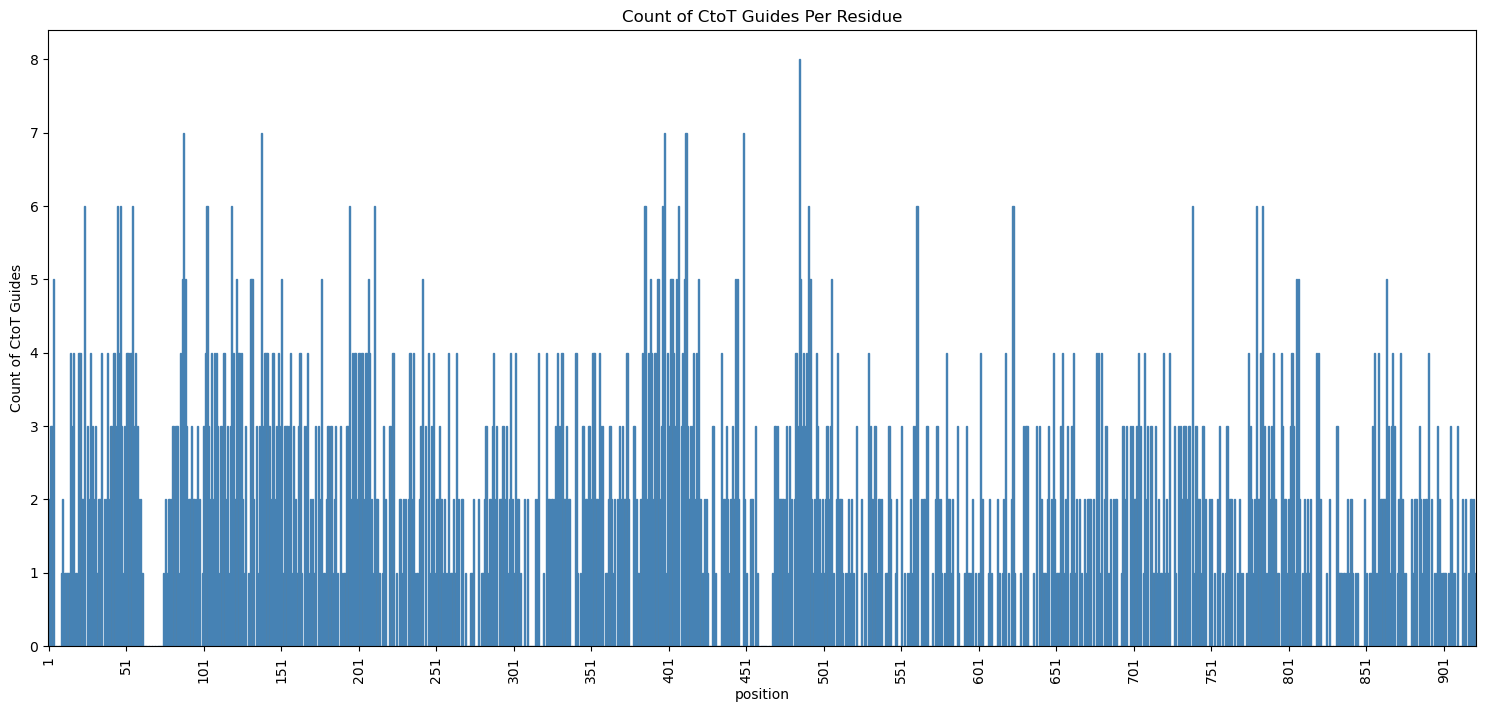

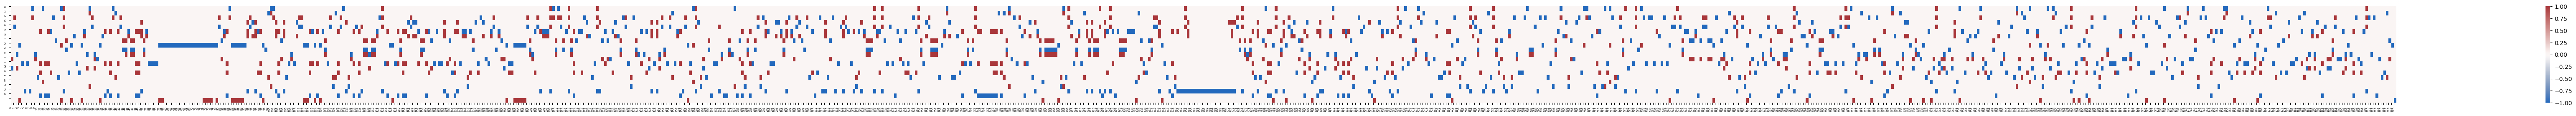

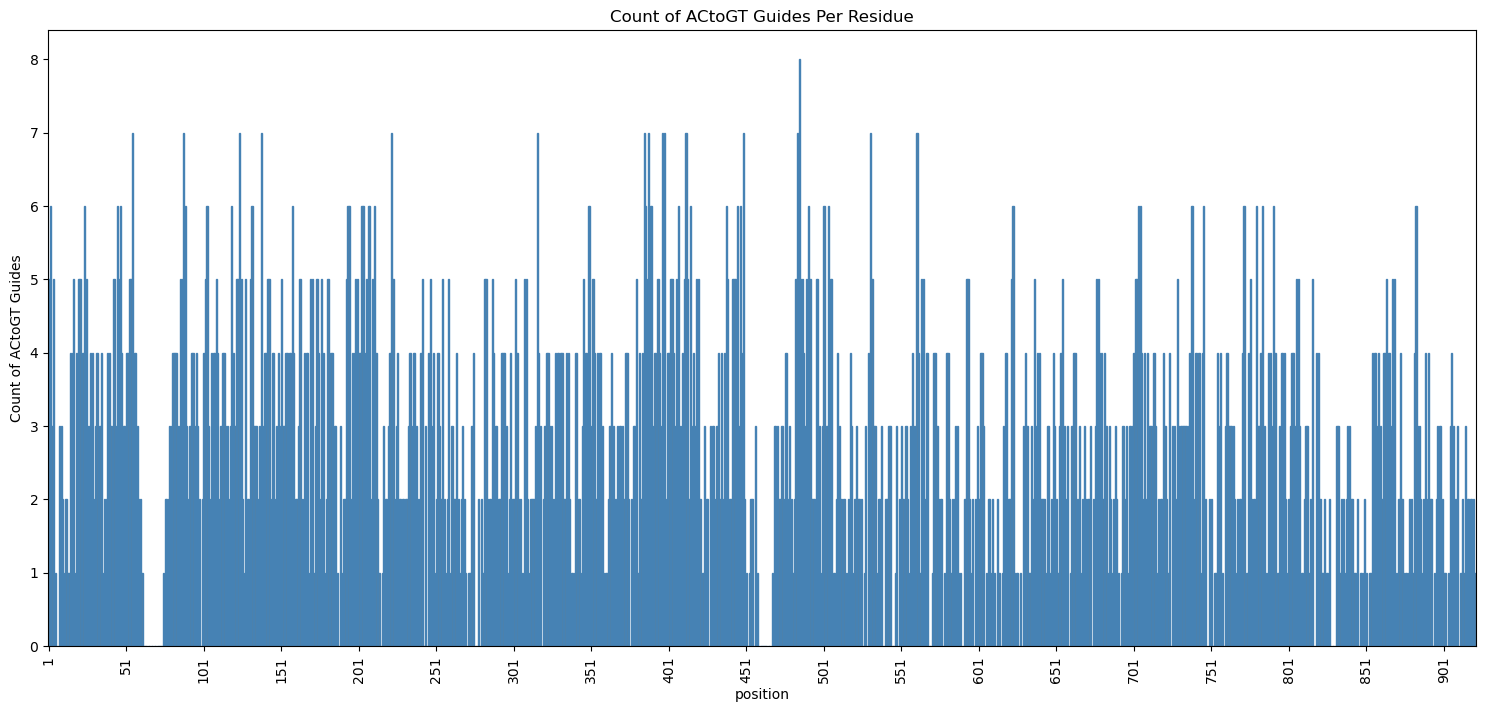

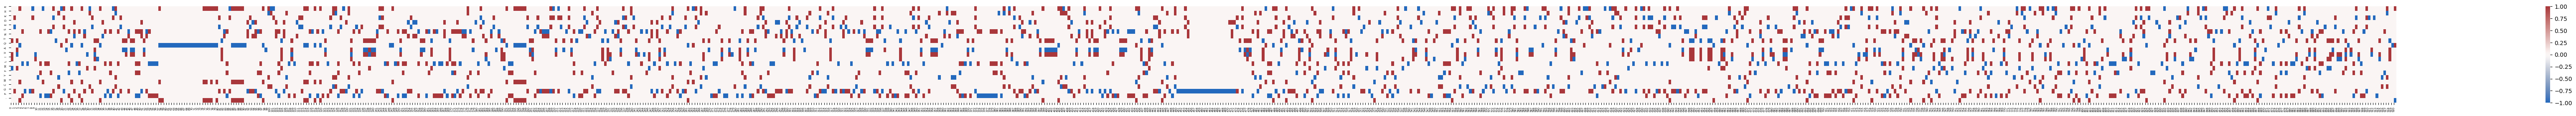

In [10]:
# More complete version
guides = design_library(
    gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
    cas_type         = "SpG", 
    edit_from_list   = ["A", "C", "AC"], 
    edit_to_list     = ["G", "T", "GT"],
    # optional inputs
    genome_file      = f"{sgrna_dir}hg38_short.fa", # truncated version of hg38 reference genome sequence
    delete           = True,
    protein_filepath = f"{sgrna_dir}P10275.fasta", 
    exclude_introns  = False, exclude_nonediting = False,
    )
print(guides.columns)
guides.head(5)

### Supplemental Function: be_scan.sgrna.add_guide_df()

In [29]:
from be_scan.sgrna import add_guide_df

control_add_guides = add_guide_df(guides_df_filepath     = f"{sgrna_dir}ARSpGCBE_annotated_guides.csv",
                                  additional_df_filepath = f"{sgrna_dir}control_lib.csv",
                                  )

control_add_guides.head(5)

,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences,editing_window,win_overlap,C_count,target_CDS,codon_window,residue_window,edit_site,mutations,muttypes,muttype
0,AAGTGCAGTTAGGGCTGGGAAGG,1.0,4.0,67545151.0,0.0,AAGTGCAGTTAGGGCTGGGAAGG,sense,plus,AR,1.0,"(7, 11)",Exon,1.0,TGCAG,GTGCAGTTA,VQL,3.0,['Q4.'],['Nonsense'],Nonsense
1,AGTGCAGTTAGGGCTGGGAAGGG,2.0,5.0,67545152.0,0.0,AGTGCAGTTAGGGCTGGGAAGGG,sense,plus,AR,1.0,"(8, 12)",Exon,1.0,GCAGT,GTGCAGTTA,VQL,3.0,['Q4.'],['Nonsense'],Nonsense
2,GTGCAGTTAGGGCTGGGAAGGGT,0.0,6.0,67545153.0,0.0,GTGCAGTTAGGGCTGGGAAGGGT,sense,plus,AR,1.0,"(9, 13)",Exon,1.0,CAGTT,CAGTTAGGG,QLG,3.0,['Q4.'],['Nonsense'],Nonsense
3,AAGGGTCTACCCTCGGCCGCCGT,2.0,23.0,67545170.0,0.0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR,1.0,"(26, 30)",Exon,1.0,GGTCT,AGGGTCTAC,RVY,9.0,[''],['Silent'],Silent
4,CTACCCTCGGCCGCCGTCCAAGA,2.0,29.0,67545176.0,0.0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR,1.0,"(32, 36)",Exon,4.0,CCCTC,TACCCTCGG,YPR,11.0,"['R13W', 'P12L', 'P12L/R13W', 'P12S', 'P12S/R1...","['Missense', 'Silent']",Mixed


### Supplemental Function: be_scan.sgrna.merge_guide_df()

In [30]:
from be_scan.sgrna import merge_guide_df

merged_guides = merge_guide_df(guide_df1_filepath=f"{sgrna_dir}ARSpGCBE_annotated_guides.csv",
                               guide_df2_filepath=f"{sgrna_dir}ARSpGABE_annotated_guides.csv",
                               )
merged_guides.head(5)

,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences,...,win_overlap,C_count,target_CDS,codon_window,residue_window,edit_site,mutations,muttypes,muttype,A_count
3,AAGGGTCTACCCTCGGCCGCCGT,2,23,67545170,0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR,1,...,Exon,1.0,GGTCT,AGGGTCTAC,RVY,9.0,[''],['Silent'],Silent,NaN
4,CTACCCTCGGCCGCCGTCCAAGA,2,29,67545176,0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR,1,...,Exon,4.0,CCCTC,TACCCTCGG,YPR,11.0,"['R13W', 'P12L', 'P12L/R13W', 'P12S', 'P12S/R1...","['Missense', 'Silent']",Mixed,NaN
5,GGCCGCCGTCCAAGACCTACCGA,1,37,67545184,0,GGCCGCCGTCCAAGACCTACCGA,sense,plus,AR,1,...,Exon,3.0,CGCCG,CCGCCGTCC,PPS,14.0,"['P15L', 'P15S', 'P15L', 'P14L', 'P14L/P15L', ...",['Missense'],Missense,NaN
6,CGCCGTCCAAGACCTACCGAGGA,1,40,67545187,0,CGCCGTCCAAGACCTACCGAGGA,sense,plus,AR,1,...,Exon,3.0,CGTCC,CCGTCCAAG,PSK,15.0,"['', 'S16F', 'S16F', 'P15L', 'P15L', 'P15L/S16...","['Missense', 'Silent']",Mixed,NaN
8,AGCTTTCCAGAATCTGTTCCAGA,2,62,67545209,0,AGCTTTCCAGAATCTGTTCCAGA,sense,plus,AR,1,...,Exon,2.0,TTTCC,GCTTTCCAG,AFQ,22.0,"['Q24.', '', 'Q24.']","['Missense', 'Nonsense', 'Silent']",Mixed,NaN


### Supplemental Function: be_scan.sgrna.annotate_guides() for unannotated dataframes

In [31]:
from be_scan.sgrna import annotate

annotated_guides = annotate(guides_file      = f"{sgrna_dir}ARSpGCBE_guides_clipped.csv",
                            gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta",
                            edit_from        = "C",
                            edit_to          = "T",
                            protein_filepath = f"{sgrna_dir}P10275.fasta", 
                            )
annotated_guides.head(5)

Warning starting_frame not found
Warning sgRNA_strand not found. No information about direction (sense, antisense).
The guide TGCCTGgtaaggaaaagggaagt match sense and antisense strands.
The guide TGCAGCCTgtaagcaaacgatgg has many occurrences.
The guide GCAGCCTgtaagcaaacgatgga match sense and antisense strands.
The guide AGCCTgtaagcaaacgatggagg match sense and antisense strands.
The guide AAGCctggagaagaagaggcaga match sense and antisense strands.
The guide CGGAAGCctggagaagaagaggc match sense and antisense strands.
Guides annotated


,sgRNA_seq,gene,gene_pos,starting_frame,sgRNA_strand,coding_seq,CtoT_editing_window,CtoT_win_overlap,C_count,CtoT_target_CDS,CtoT_codon_window,CtoT_residue_window,CtoT_edit_site,CtoT_mutations,CtoT_muttypes,CtoT_muttype
0,AAGTGCAGTTAGGGCTGGGAAGG,AR,4,1,sense,AAGTGCAGTTAGGGCTGGGAAGG,"(7, 11)",Exon,1,TGCAG,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
1,AGTGCAGTTAGGGCTGGGAAGGG,AR,5,2,sense,AGTGCAGTTAGGGCTGGGAAGGG,"(8, 12)",Exon,1,GCAGT,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
2,GTGCAGTTAGGGCTGGGAAGGGT,AR,6,0,sense,GTGCAGTTAGGGCTGGGAAGGGT,"(9, 13)",Exon,1,CAGTT,CAGTTAGGG,QLG,3.0,[Q4.],[Nonsense],Nonsense
3,AAGGGTCTACCCTCGGCCGCCGT,AR,23,2,sense,AAGGGTCTACCCTCGGCCGCCGT,"(26, 30)",Exon,1,GGTCT,AGGGTCTAC,RVY,9.0,[],[Silent],Silent
4,CTACCCTCGGCCGCCGTCCAAGA,AR,29,2,sense,CTACCCTCGGCCGCCGTCCAAGA,"(32, 36)",Exon,4,CCCTC,TACCCTCGG,YPR,11.0,"[R13W, P12L, P12L/R13W, P12S, P12S/R13W, P12F,...","[Missense, Silent]",Mixed


### Supplemental Function: be_scan.sgrna.annotate_guides() for dual editor

In [32]:
from be_scan.sgrna import annotate

annotated_guides = annotate(guides_file      = "CBE_guides.csv",
                                   gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta",
                                   edit_from        = "CA",
                                   edit_to          = "TG",
                                   protein_filepath = f"{sgrna_dir}P10275.fasta", 
                                   )
annotated_guides.head(5)

Guides annotated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,...,CAtoTG_editing_window,CAtoTG_win_overlap,CA_count,CAtoTG_target_CDS,CAtoTG_codon_window,CAtoTG_residue_window,CAtoTG_edit_site,CAtoTG_mutations,CAtoTG_muttypes,CAtoTG_muttype
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,...,"(-16, -12)",Intron,0,tcagc,attcagcca,___,-5.0,[],[],None
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,...,"(-15, -11)",Intron,0,cagcc,cagccaagc,___,-5.0,[],[],None
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,...,"(-12, -8)",Intron,0,ccaag,ccaagctca,___,-4.0,[],[],None
3,gccaagctcaaggATGGAAG,TGC,2,-13,67545134,0,gccaagctcaaggATGGAAG,sense,plus,AR,...,"(-10, -6)",Intron,0,aagct,ccaagctca,___,-3.0,[],[],None
4,aagctcaaggATGGAAGTGC,AGT,2,-10,67545137,0,aagctcaaggATGGAAGTGC,sense,plus,AR,...,"(-7, -3)",Intron,0,ctcaa,agctcaagg,___,-2.0,[],[],None


## be_scan.analysis Function Calls

Sample sheet is set up like this: 

| sample_id | fastq_file       | condition  | agg_conditions | counts_file  | noncounts_file  | stats_file  |
| --------- | ----------       | ---------  | -------------- | -----------  | --------------  | ----------  |
| 0         | control.fastq.gz | t0         | t0             | counts-1.csv | noncounts-1.csv | stats-1.txt |
| 1         | cond_A1.fastq.gz | unsorted-1 | unsorted       | counts-2.csv | noncounts-2.csv | stats-2.txt |
| 2         | cond_A2.fastq.gz | unsorted-2 | unsorted       | counts-3.csv | noncounts-3.csv | stats-3.txt |
| 3         | cond_A3.fastq.gz | unsorted-3 | unsorted       | counts-4.csv | noncounts-4.csv | stats-4.txt |
| 4         | cond_B1.fastq.gz | sorted-1   | sorted         | counts-5.csv | noncounts-5.csv | stats-5.txt |
| 5         | cond_B2.fastq.gz | sorted-2   | sorted         | counts-6.csv | noncounts-6.csv | stats-6.txt |
| 6         | cond_B3.fastq.gz | sorted-3   | sorted         | counts-7.csv | noncounts-7.csv | stats-7.txt |

Comparisons sheet is set up like this: 

| name | treatment | control |
| ---- | --------- | ------- |
| sorted-unsorted | sorted | unsorted |

The names for treatment and control in the comparison sheet should correspond to the agg_conditions in the sample sheet

In [3]:
analysis_dir = "../../../tests/test_data/analysis/"

### Function 1: be_scan.analysis.count_reads()

In [4]:
import be_scan

be_scan.analysis.count_reads(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    file_dir     = analysis_dir, 
    KEY_INTERVAL = (0,35),
    KEY          = "ABCDEF",
    KEY_REV      = "GHIJKL",
    save         = False, 
)


../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
Count reads completed


,sgRNA_seq,gene,counts1,counts2,counts3,counts4
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86


### Function 2: be_scan.analysis.merge_and_norm()

In [5]:
import be_scan

be_scan.analysis.merge_and_norm(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv",
    counts_library = f"{analysis_dir}count_reads_sample_out.csv", 
    controls = ["counts1"],
)

merge_and_norm outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/agg_log2_t0.csv
Merge and normalize completed


,sgRNA_seq,gene,counts1,counts2,counts3,counts4,counts1_subt0,counts2_log2,counts2_subt0,counts3_log2,counts3_subt0,counts4_log2,counts4_subt0
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,0.0,18.042458,0.110884,17.973953,0.042378,18.049630,0.118055
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,0.0,0.000000,-17.931574,11.404624,-6.526951,12.335658,-5.595916
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,17.919602,17.919602,17.927659,17.927659,17.979241,17.979241
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.000000,12.404358,12.404358,13.335518,13.335518
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,90,0.0,17.919602,-0.011973,17.927659,-0.003915,17.827238,-0.104336
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,0.0,17.837140,-0.094434,17.847041,-0.084533,17.761650,-0.169924


### Function 3: be_scan.analysis.average_reps()

In [6]:
import be_scan

be_scan.analysis.average_reps(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv",
    log2_subt0    = f"{analysis_dir}merge_and_norm_sample_out.csv", 
)

average_reps outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/avg_conds.csv
Average reps completed


,sgRNA_seq,gene,counts1,counts2,counts3,counts4,counts1_subt0,counts2_log2,counts2_subt0,counts3_log2,counts3_subt0,counts4_log2,counts4_subt0,t0_subctrl_avg,t0_subctrl_stdev,cond1_subctrl_avg,cond1_subctrl_stdev
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,0.0,18.042458,0.110884,17.973953,0.042378,18.049630,0.118055,0.0,0,0.090439,0.041776
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,0.0,0.000000,-17.931574,11.404624,-6.526951,12.335658,-5.595916,0.0,0,-10.018147,6.869021
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,17.919602,17.919602,17.927659,17.927659,17.979241,17.979241,0.0,0,17.942167,0.032358
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.000000,12.404358,12.404358,13.335518,13.335518,0.0,0,8.579959,7.445034
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,90,0.0,17.919602,-0.011973,17.927659,-0.003915,17.827238,-0.104336,0.0,0,-0.040075,0.055798
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,0.0,17.837140,-0.094434,17.847041,-0.084533,17.761650,-0.169924,0.0,0,-0.116297,0.046705


### Function 4: be_scan.analysis.compare_conds()

In [8]:
be_scan.analysis.compare_conds(
    comparisons   = f"{analysis_dir}comparisons.csv", 
    avg_conds     = f"{analysis_dir}average_reps_sample_out.csv", 
)

compare_conds outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/conditions.csv
Compare conditions completed


,sgRNA_seq,gene,counts1,counts2,counts3,counts4,counts1_subt0,counts2_log2,counts2_subt0,counts3_log2,counts3_subt0,counts4_log2,counts4_subt0,t0,t0_stdev,cond1_subctrl_avg,cond1_subctrl_stdev,cond1-cond1
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,0.0,18.042458,0.110884,17.973953,0.042378,18.049630,0.118055,0.0,0,0.090439,0.041776,0.0
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,0.0,0.000000,-17.931574,11.404624,-6.526951,12.335658,-5.595916,0.0,0,-10.018147,6.869021,0.0
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,17.919602,17.919602,17.927659,17.927659,17.979241,17.979241,0.0,0,17.942167,0.032358,0.0
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.000000,12.404358,12.404358,13.335518,13.335518,0.0,0,8.579959,7.445034,0.0
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,90,0.0,17.919602,-0.011973,17.927659,-0.003915,17.827238,-0.104336,0.0,0,-0.040075,0.055798,0.0
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,0.0,17.837140,-0.094434,17.847041,-0.084533,17.761650,-0.169924,0.0,0,-0.116297,0.046705,0.0


### Function 5: be_scan.analysis.calc_controls()

In [38]:
import be_scan

be_scan.analysis.calc_controls(
    conditions          = f"{analysis_dir}compare_conds_sample_out.csv", 
    stats_comparisons   = ['cond1-cond1'], 
    neg_ctrl_col        = 'gene', 
    neg_ctrl_conditions = ['control'], 
    )

calc_controls outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/stats.txt
Calculating controls completed


### Function 1-5: be_scan.analysis.batch_process()

In [9]:
import be_scan
be_scan.analysis.batch_process(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    comparisons   = f"{analysis_dir}comparisons.csv", 
    neg_ctrl_col  = 'gene', # optional
    neg_ctrl_conditions = ['control'], # optional

    file_dir     = analysis_dir, 
    KEY_INTERVAL = (0,35),
    KEY          = "ABCDEF",
    KEY_REV      = "GHIJKL",
    controls = ["counts1"],
)

../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
count_reads outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/counts_library.csv
Count reads completed
merge_and_norm outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/agg_log2_t0.csv
Merge and normalize completed
average_reps outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/avg_conds.csv
Average reps completed
compare_conds outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/conditions.csv
Compare conditions completed
calc_controls outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/stats.txt
Calculating controls completed


## be_scan.plot Function Calls

Starting from Nick's DNMT3A data in the .csv format and regenerating the scatterplot, boxplot, correlation heatmap, and correlation scatterplot. 

In [11]:
plot_file = '../../../tests/test_data/plot/NZL10196_v9_comparisons.csv'

### Function 1: be_scan.plot.scatterplot()

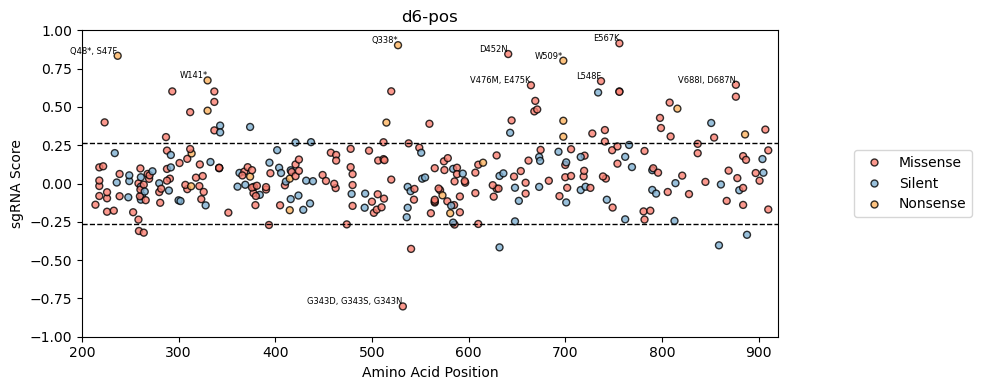

In [12]:
import be_scan

be_scan.plot.scatterplot(df_filepath  = plot_file, # data
        x_column     = 'Edit_site_3A1',  # name of a column in data
        comparisons  = ['d6-pos'],       # names of a column in data, each is a graph

        include_hue=True, hue_col='Mut_type', # color settings
        neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], # negative control points
        filter_params=True, params_cols=['Mut_type', 'Gene'], # filter for only these categories
        params_conditions=[['Nonsense', 'Missense', 'Silent'], ['DNMT3A']], 
        autoannot=True, autoannot_top=10, autoannot_label='Mut_list_all', # automatically label points
        xlim_kws={'xmin': 200, 'xmax': None}, savefig = False, # figure adjustments
        )

### Function 2: be_scan.plot.corr_heatmap()

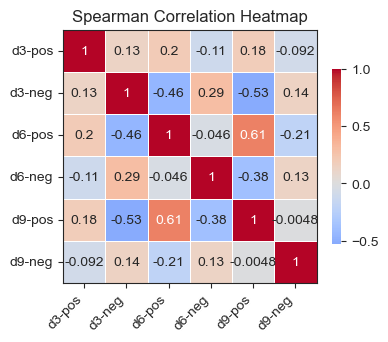

In [13]:
import be_scan

be_scan.plot.corr_heatmap(df_filepath = plot_file, # data
                          comparisons = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], # names of columns in data
                          savefig     = False,
                          )

### Function 3: be_scan.plot.corr_jointplot()

R: -0.7088480332812986 (p-value 2.6007890349625913e-112)
R2: 0.5024655342867651


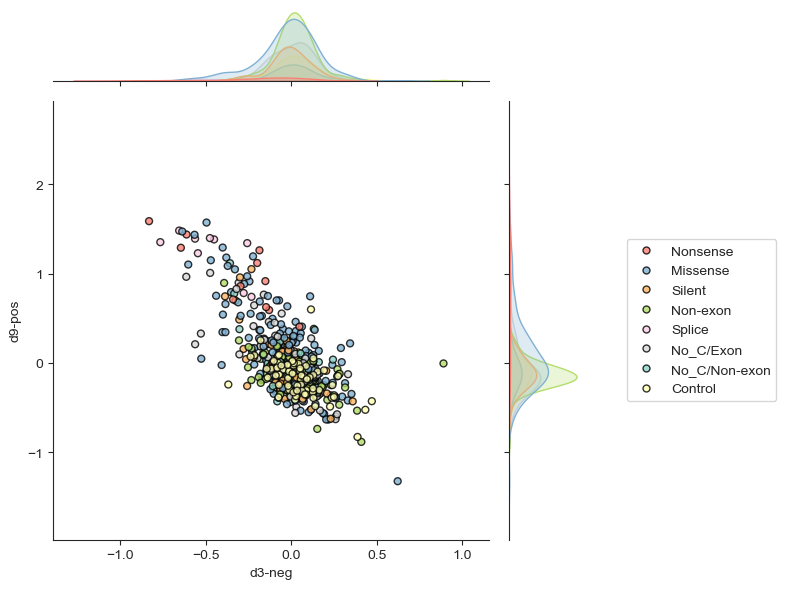

In [14]:
import be_scan

be_scan.plot.corr_jointplot(df_filepath = plot_file, condition1 = 'd3-neg', condition2 = 'd9-pos', # names of columns in data
                        include_hue = True, hue_col = 'Mut_type',  # name of a column in data
                        savefig = False,
                        )

### Function 4: be_scan.plot.boxplot()

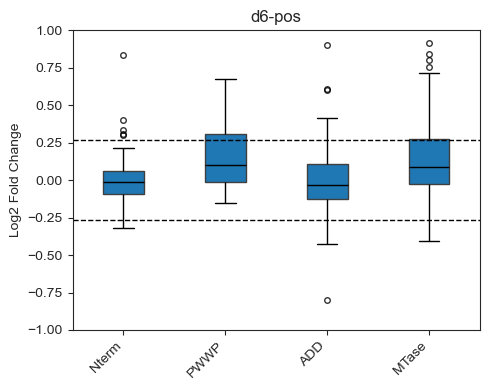

In [15]:
import be_scan

be_scan.plot.boxplot(df_filepath  = plot_file, # data
                     comparisons  = ['d6-pos'],  # name of a column in data, each column is a graph
                     plot_column = 'Domain', plot_conditions = ['PWWP', 'ADD', 'MTase', 'Nterm'], # how to split up boxes in graph
 
                     neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], 
                     filter_params=True, params_cols=['Win_overlap'], params_conditions=[['Exon']], 
                     savefig = False, 
)

### Function 5: be_scan.plot.sgrna_enrichment()

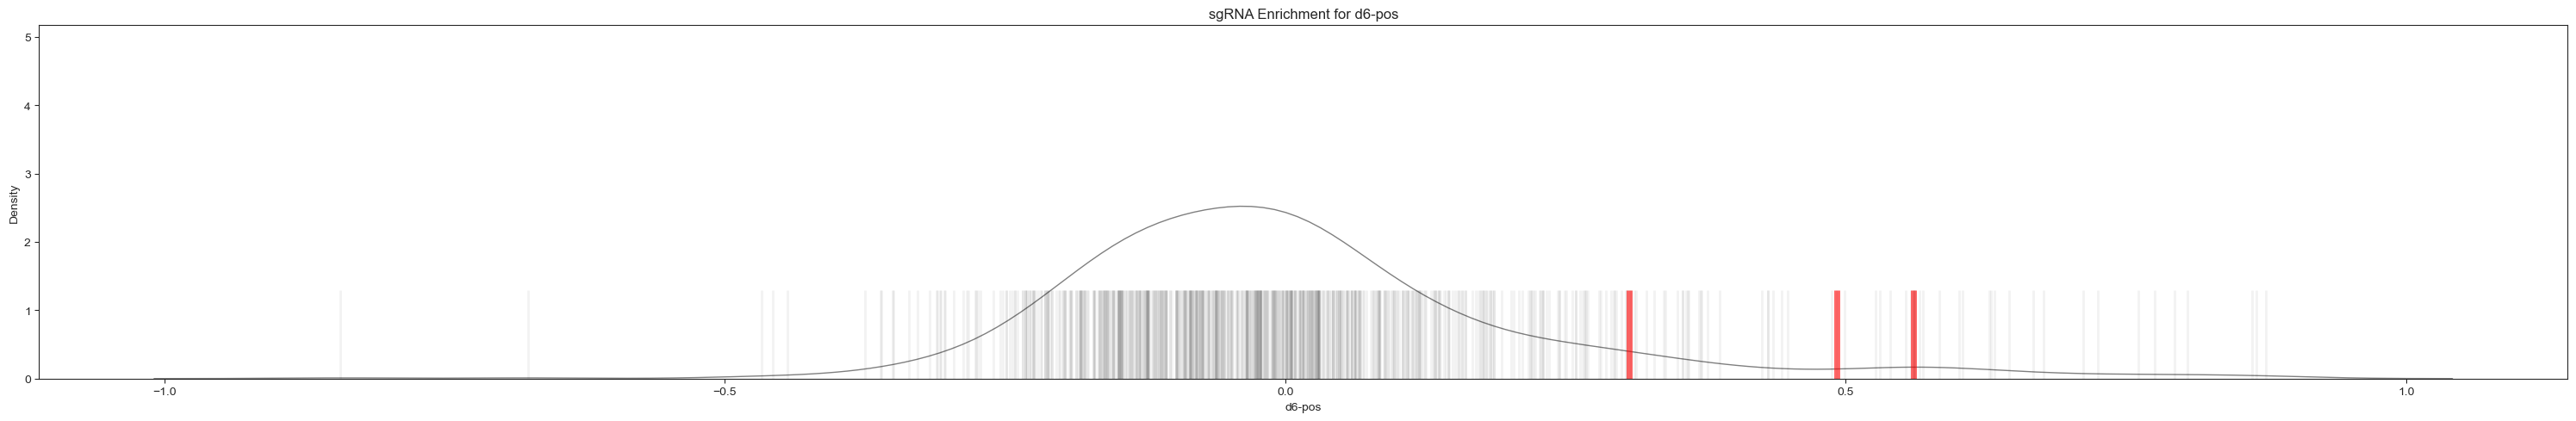

In [16]:
import be_scan

be_scan.plot.sgrna_enrichment(df_filepath  = plot_file, # data
                              comparisons  = ['d6-pos'],  # name of a column in data, each column is a graph
                              highlight=True, highlight_col='sgRNA_ID', 
                              highlight_vals=['DNMT3A2_149', 'DNMT3A2_150', 'DNMT3A2_151'], 

                              savefig = False, 
        )

### Function 6: be_scan.plot.loess_smoothing()

Takes about 2 minutes to run for n_repeats=10,000

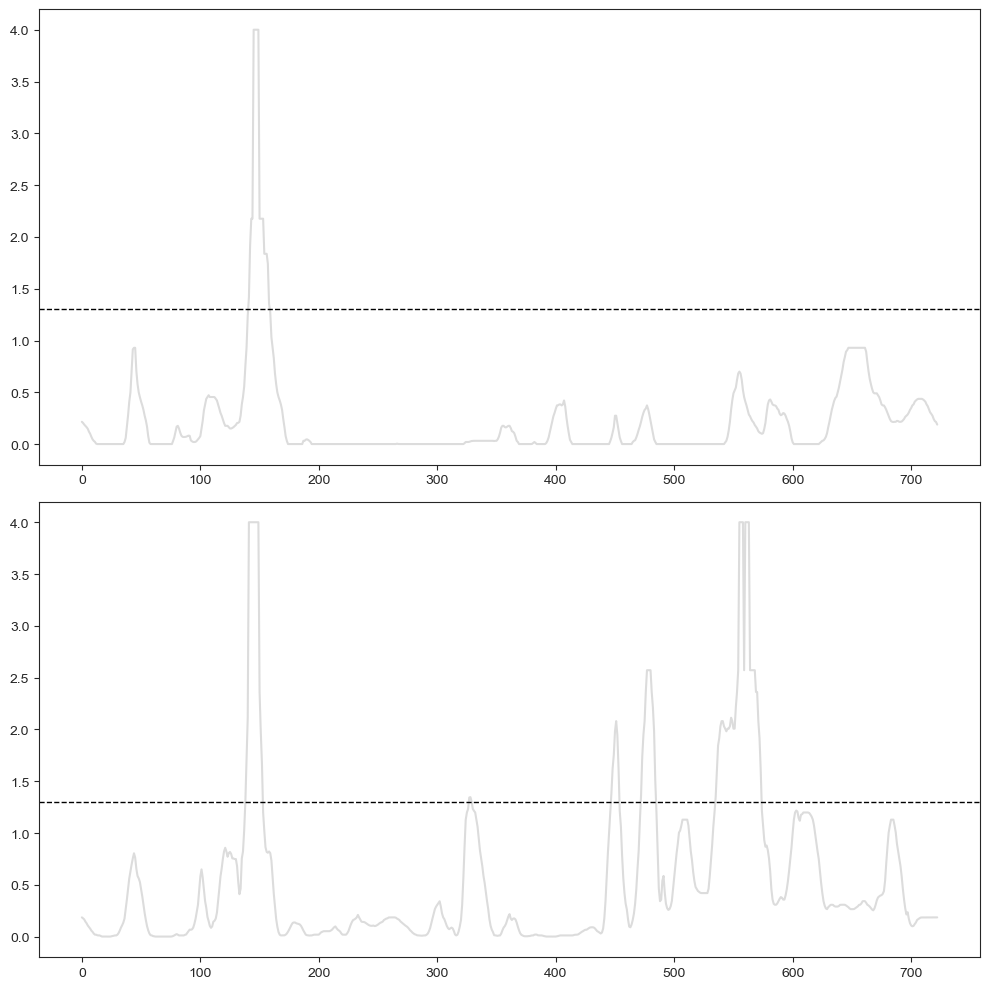

In [17]:
import be_scan

be_scan.plot.loess_smoothing(df_filepath  = plot_file, # data
                             x_column='Edit_site',  
                             comparisons=['d3-pos', 'd6-pos'], span=0.05, n_repeats=10000, 
                             savefig = False, return_df=False, 
        )